<a href="https://colab.research.google.com/github/Mostafa-Khooshebast/Mostafa-Khooshebast/blob/main/breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Breast Cancer Detection via miRNA - Normal Breast Tissue and Cancerous Breast
#### MSc Thesis - Hakim Sabzevari University - Iran - 2022
#### Powred by: Mostafa Khosheh BastBaghsangani - 9813353496

## Database

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tomaster Boruta
!pip install BorutaShap
!pip install xgboost
!pip install --upgrade xgboost
!pip install scikit-learn -U
#!pip install gudhi
#!pip install ripser umap-learn kmapper persim PersistenceImages

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 3.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 7.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 192.9 MB 71 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # statistical graphics
import scipy as sp

import matplotlib.pyplot as plt
import datetime
import lightgbm

from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

from __future__ import print_function

from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from boruta import BorutaPy
from BorutaShap import BorutaShap

#from ripser import ripser
#import persim
#import gudhi
from skimage.filters import threshold_otsu
from scipy.ndimage.morphology import distance_transform_edt
from datetime import datetime

import random
import warnings
warnings.filterwarnings('ignore')

# importing os module
import os
#print(os.listdir("/content/drive/MyDrive/GSE58606/GSE58606_data.csv"))


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data= pd.read_csv("/content/drive/MyDrive/GSE58606/GSE58606_data.csv")

In [ ]:
data.head()

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,...,169411 : hsa-miR-205-3p,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target,target_actual
0,6.877643,8.080215,6.245265,6.304782,6.686064,7.805950,6.814781,7.146955,6.170680,6.129586,...,7.176684,7.724408,6.035476,6.255048,6.572019,6.251777,5.873303,6.362097,1,primary breast cancer
1,6.544287,6.882722,5.874236,6.324987,6.638048,6.946567,6.488574,6.690773,6.160272,6.104929,...,7.249094,7.308890,6.021796,6.902473,6.347183,6.625569,6.004899,6.560329,1,primary breast cancer
2,6.879713,6.885387,5.958748,6.317687,6.664956,7.266728,6.965078,6.969818,6.226957,6.124874,...,7.404104,7.466418,5.977962,6.484571,6.259788,6.226957,5.815442,6.354622,1,primary breast cancer
3,6.943464,7.972342,6.026106,6.425266,6.761433,8.010618,6.441945,6.679714,6.471518,6.264685,...,6.811846,8.601204,6.021790,5.912640,6.002302,5.999349,5.811117,6.306704,1,primary breast cancer
4,7.097877,9.014977,7.127656,6.566482,6.990273,8.746360,8.087122,7.680249,6.499892,6.226560,...,6.361862,7.570751,5.967819,5.821186,6.550078,5.947994,5.828413,6.288596,1,primary breast cancer


In [ ]:
data=data.dropna(axis=0, how='any')
data.shape

(133, 1928)

In [ ]:
assert data.target.notnull().all()
#returns nothing it means we don't have any nan values.

In [ ]:
data.groupby("target_actual").count()

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,...,169410 : hsa-miR-556-5p,169411 : hsa-miR-205-3p,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target
target_actual,,,,,,,,,,,,,,,,,,,,,
normal breast tissue,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
primary breast cancer,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122


In [ ]:
data.groupby("target").count()

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,...,169410 : hsa-miR-556-5p,169411 : hsa-miR-205-3p,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target_actual
target,,,,,,,,,,,,,,,,,,,,,
0,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
1,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122


## Feature Selection:

### Correlation

In [ ]:
correlations= data.corr()
correlations = correlations["target"].sort_values(ascending=False)

In [ ]:
corr_many= correlations[correlations >0.5]
corr_many

target                  1.000000
46361 : hsa-miR-1278    0.539459
Name: target, dtype: float64

In [ ]:
corr_few= correlations[(correlations >0.10) & (correlations < 0.11)]
corr_few

168789 : hsa-miR-4686         0.109985
168704 : hsa-miR-506-5p       0.109844
147613 : hsa-miR-3145-3p      0.109687
10923 : hsa-miR-107           0.109568
148652 : hsa-miR-620          0.109554
42584 : hsa-miR-432-3p        0.109122
169130 : hsa-miR-4764-3p      0.109119
148625 : hsa-miR-941          0.108832
147334 : hsa-miR-3613-5p      0.108744
146196 : hsa-miR-711          0.108265
169307 : hsa-miR-4685-3p      0.108126
148590 : hsa-miR-3919         0.107977
168601 : hsa-miR-146b-3p      0.107766
148430 : hsa-miR-374c-5p      0.107016
169369 : hsa-miR-4490         0.106945
146010 : hsa-miR-2116-5p      0.106454
11037 : hsa-miR-299-3p        0.106386
168671 : hsa-miR-3140-5p      0.105361
146112 : hsa-miR-30b-5p       0.105062
46440 : hsa-miR-1287          0.105040
169172 : hsa-miR-4445-3p      0.104957
42493 : hsa-miR-892b          0.104584
11024 : hsa-miR-223-3p        0.104370
46414 : hsa-miR-548h-5p       0.103401
168753 : hsa-miR-4741         0.103363
168680 : hsa-miR-378f    

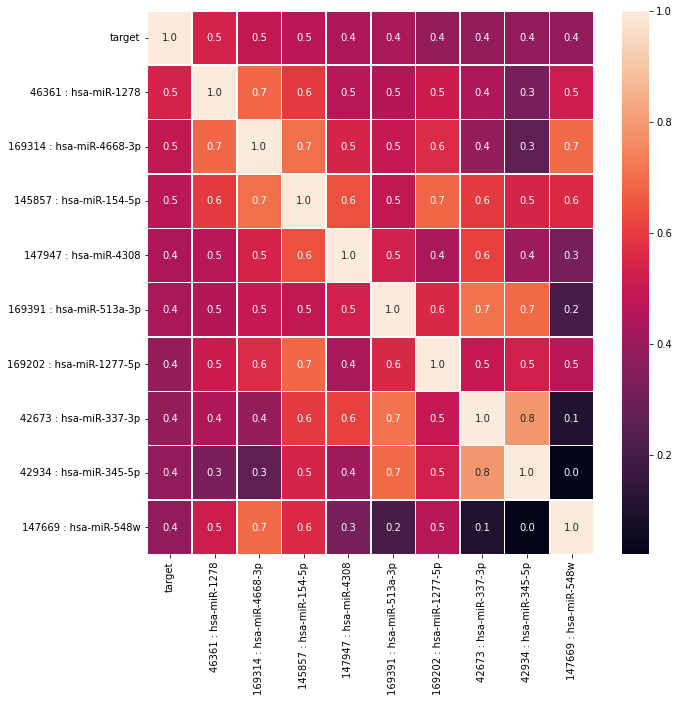

In [ ]:
features= correlations.index[0:10]
f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(data.loc[:,features].corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

[0.         0.00066071 0.00049553 ... 0.         0.         0.        ]


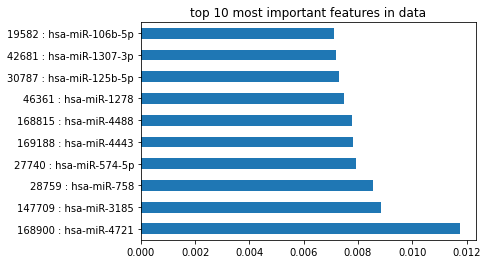

In [ ]:
#Data for Analysis
feature =data[data.columns[0:1926]] #independent columns
target=data.iloc[:,1926] #target column

model = ExtraTreesClassifier()
model.fit(feature,target)
print(model.feature_importances_) #use inbuilt class 

feat_importances = pd.Series(model.feature_importances_, index=feature.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("top 10 most important features in data")
plt.show()

### Compare to Normal and Cancer Tissues

In [ ]:
## Normal Breast Tissue
normal= data[data.target==0]
normal

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,...,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target,target_actual_primary breast cancer,target_actual_nan
7,6.871355,7.282716,6.594995,6.631758,6.974438,7.682559,6.909911,6.950120,6.309812,6.317177,...,7.022045,5.997490,5.826928,6.243042,6.028338,5.834648,6.265779,0,0,0
8,7.167071,7.950224,6.771967,6.616591,7.266409,7.532681,7.363235,7.076433,6.616557,6.349398,...,7.730487,6.045569,5.881064,6.702749,5.931166,5.801785,6.145808,0,0,0
83,7.402183,7.817305,6.724805,6.715480,7.052417,7.748537,7.307196,7.092431,6.364196,6.325494,...,6.854712,5.998231,5.838666,6.251220,5.938210,5.817637,6.291667,0,0,0
84,7.170484,7.328380,6.734653,6.623865,7.053051,7.618403,6.840367,6.917418,6.367334,6.280619,...,7.241104,6.000154,5.825051,6.367334,5.970134,5.811297,6.255190,0,0,0
85,7.113876,7.996472,6.734699,6.710902,7.004226,8.086849,7.785249,7.347443,6.321942,6.280750,...,7.855577,6.046862,5.850599,6.421864,5.945078,5.809433,6.356130,0,0,0
86,6.968060,7.018767,6.620810,6.629168,7.001467,7.251261,6.694891,6.792098,6.353568,6.271874,...,7.609216,6.019187,5.874408,6.388032,6.047557,5.795006,6.310541,0,0,0
87,6.980837,8.316881,6.746943,6.612999,6.966934,7.790571,7.928530,6.991754,6.312005,6.277381,...,7.088231,5.998384,5.813224,6.718936,5.989918,5.822548,6.242760,0,0,0
88,6.986162,7.802873,6.566131,6.595654,6.993295,7.480428,7.227749,6.882980,6.296467,6.280904,...,7.566319,6.047740,5.939809,6.602124,5.999426,5.831013,6.277689,0,0,0
89,7.149041,7.595640,6.812115,6.692238,7.247108,7.477918,7.029616,6.948524,6.477480,6.433444,...,7.355739,6.109072,5.949933,6.361811,5.960647,5.844842,6.077561,0,0,0
90,7.019296,6.948894,6.637287,6.699782,7.174597,7.111974,6.659953,6.937121,6.502731,6.451627,...,7.400495,5.996626,5.942482,6.325245,5.941677,5.824224,6.145609,0,0,0


In [ ]:
normal.describe()

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,...,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target,target_actual_primary breast cancer,target_actual_nan
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.0,11.0
mean,7.070689,7.654102,6.679532,6.624440,7.052103,7.583899,7.183288,6.970932,6.393249,6.314390,...,7.325114,6.021340,5.888909,6.427820,6.016092,5.815755,6.244289,0.0,0.0,0.0
std,0.148332,0.455469,0.092878,0.103831,0.128799,0.263622,0.412703,0.162566,0.100080,0.075168,...,0.345117,0.037993,0.069773,0.169426,0.140798,0.018600,0.085776,0.0,0.0,0.0
min,6.871355,6.948894,6.530446,6.340408,6.839192,7.111974,6.659953,6.743930,6.296467,6.189620,...,6.852333,5.975425,5.813224,6.243042,5.931166,5.780869,6.077561,0.0,0.0,0.0
25%,6.974449,7.305548,6.607902,6.614795,6.983866,7.479173,6.875139,6.900199,6.316973,6.279000,...,7.055138,5.997860,5.832797,6.324456,5.943378,5.805609,6.194284,0.0,0.0,0.0
50%,7.019296,7.802873,6.724805,6.629168,7.004226,7.618403,7.227749,6.948524,6.364196,6.280904,...,7.355739,6.000154,5.874408,6.367334,5.970134,5.817637,6.265779,0.0,0.0,0.0
75%,7.158056,7.973348,6.740821,6.696010,7.113824,7.715548,7.335216,7.034093,6.440564,6.337446,...,7.587767,6.046216,5.941146,6.511994,6.013882,5.827618,6.301104,0.0,0.0,0.0
max,7.402183,8.316881,6.812115,6.715480,7.266409,8.086849,7.928530,7.347443,6.616557,6.451627,...,7.855577,6.109072,6.035830,6.718936,6.424863,5.844842,6.356130,0.0,0.0,0.0


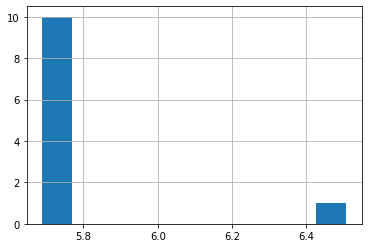

In [ ]:
### the highest correlation
normal["46361 : hsa-miR-1278"].hist()

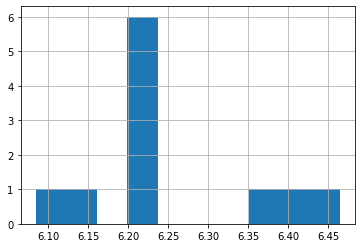

In [ ]:
## the lowest correlation
normal["168626 : hsa-miR-4662a-5p"].hist()

In [ ]:
## Cancer data
cancer= data[data.target==1]
cancer

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,...,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target,target_actual_primary breast cancer,target_actual_nan
0,6.877643,8.080215,6.245265,6.304782,6.686064,7.805950,6.814781,7.146955,6.170680,6.129586,...,7.724408,6.035476,6.255048,6.572019,6.251777,5.873303,6.362097,1,1,0
1,6.544287,6.882722,5.874236,6.324987,6.638048,6.946567,6.488574,6.690773,6.160272,6.104929,...,7.308890,6.021796,6.902473,6.347183,6.625569,6.004899,6.560329,1,1,0
2,6.879713,6.885387,5.958748,6.317687,6.664956,7.266728,6.965078,6.969818,6.226957,6.124874,...,7.466418,5.977962,6.484571,6.259788,6.226957,5.815442,6.354622,1,1,0
3,6.943464,7.972342,6.026106,6.425266,6.761433,8.010618,6.441945,6.679714,6.471518,6.264685,...,8.601204,6.021790,5.912640,6.002302,5.999349,5.811117,6.306704,1,1,0
4,7.097877,9.014977,7.127656,6.566482,6.990273,8.746360,8.087122,7.680249,6.499892,6.226560,...,7.570751,5.967819,5.821186,6.550078,5.947994,5.828413,6.288596,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,6.849780,7.083936,6.261399,6.435883,6.794999,6.020534,6.577311,6.678175,6.344963,6.193073,...,6.835991,6.068298,5.901675,6.092105,6.365560,5.961542,6.374902,1,1,0
128,7.069042,6.928371,6.361283,6.419449,7.047141,7.177212,6.653090,6.749214,6.404046,6.188651,...,7.730168,6.023850,5.820426,6.118422,6.035515,5.776698,6.312001,1,1,0
129,7.220528,7.135147,6.358755,6.525857,7.054967,7.533287,6.645902,6.825213,6.416208,6.219274,...,7.997207,6.125245,5.822034,6.008232,6.000131,5.807077,6.336421,1,1,0
130,6.753913,6.634270,6.167049,6.404217,6.760727,6.811819,6.340138,6.595280,6.340526,6.124168,...,6.498206,6.160170,5.833019,5.949871,6.577482,6.395739,6.546783,1,1,0


In [ ]:
cancer.describe()

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,...,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target,target_actual_primary breast cancer,target_actual_nan
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,...,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.0,122.0,122.0
mean,7.041076,7.569684,6.369854,6.519831,6.882039,7.394873,6.816057,7.003056,6.342573,6.265293,...,7.369521,6.046234,5.999167,6.195562,6.084277,5.864268,6.336533,1.0,1.0,0.0
std,0.283709,0.712436,0.312067,0.121731,0.177207,0.765839,0.434708,0.314582,0.094948,0.080372,...,0.620042,0.070005,0.255658,0.209545,0.162496,0.092670,0.103120,0.0,0.0,0.0
min,6.544287,6.449102,5.839559,6.277386,6.273818,5.817342,6.228906,6.527857,6.089912,6.099233,...,6.246596,5.906457,5.788293,5.868281,5.884369,5.773184,6.113908,1.0,1.0,0.0
25%,6.837015,6.977873,6.179872,6.423879,6.751220,6.887993,6.490188,6.767335,6.279978,6.201172,...,6.892496,5.992160,5.839517,6.039255,5.965293,5.820154,6.277028,1.0,1.0,0.0
50%,6.981764,7.476959,6.343322,6.520074,6.863739,7.352129,6.722788,6.969514,6.338939,6.265278,...,7.366703,6.024618,5.903100,6.149888,6.052806,5.843247,6.333084,1.0,1.0,0.0
75%,7.215215,7.973957,6.546839,6.605548,6.996530,7.902463,7.034499,7.157032,6.397713,6.320061,...,7.829369,6.107685,6.058410,6.281095,6.143953,5.876712,6.377946,1.0,1.0,0.0
max,7.869898,9.289878,7.264142,6.835292,7.429032,9.270409,8.531716,8.040414,6.657749,6.473999,...,8.991300,6.238010,7.032159,7.184284,6.805058,6.413199,6.769885,1.0,1.0,0.0


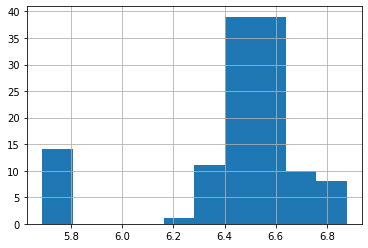

In [ ]:
cancer["46361 : hsa-miR-1278"].hist()

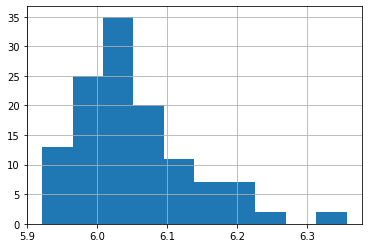

In [ ]:
cancer["168626 : hsa-miR-4662a-5p"].hist()

In [ ]:
### Normalization
X =data[data.columns[0:1926]] #independent columns
Y=data.iloc[:,1926] #target column i.e target
X= (X - np.min(X))/(np.max(X) - np.min(X))

### Boruta

In [ ]:
data = pd.get_dummies(data, drop_first=True, dummy_na=True)
data.shape

(133, 1929)

In [ ]:
# Get all feature names from the dataset
feature1 = [f for f in data.columns if f not in ['TARGET','SK_ID_CURR']]
len(feature1)

1929

In [ ]:
# Replace all missing values with the Mean.
data[feature1] = data[feature1].fillna(data[feature1].mean()).clip(-1e9,1e9)

In [ ]:
# Get the final dataset X and labels Y
X = data[feature1].values
Y = data['target'].values.ravel()

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=50, max_iter = 50, perc = 90)
boruta_feature_selector.fit(X, Y)

#timer(start_time)

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	1929
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	1929
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	1929
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	1929
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	1929
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	1929
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	1929
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	242
Tentative: 	1265
Rejected: 	422
Iteration: 	9 / 50
Confirmed: 	242
Tentative: 	1265
Rejected: 	422
Iteration: 	10 / 50
Confirmed: 	242
Tentative: 	1265
Rejected: 	422
Iteration: 	11 / 50
Confirmed: 	242
Tentative: 	1265
Rejected: 	422
Iteration: 	12 / 50
Confirmed: 	283
Tentative: 	1038
Rejected: 	608
Iteration: 	13 / 50
Confirmed: 	283
Tentative: 	1038
Rejected: 	608
Iteration: 	14 / 50
Confirmed: 	283
Tentative: 	1038
Rejected: 	608
Iteration: 	15 / 50
Confirmed: 	283
Tentative: 	1038
Rejected: 	608
Iteration: 	16 / 

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=841, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F7FAD93D270),
         max_iter=50, n_estimators='auto', perc=90,
         random_state=RandomState(MT19937) at 0x7F7FAD93D270, verbose=2)

In [ ]:
# check selected features - first 5 features are selected
print("\n Selected Features: ", boruta_feature_selector.support_)

# check ranking of features
print("\n Ranking: ", boruta_feature_selector.ranking_)

# number of selected features
print('\n Number of selected features:', boruta_feature_selector.n_features_)

# Transform dataset
X_filtered = boruta_feature_selector.transform(X)
X_filtered.shape
print("\n Selected Transformed Features \n", X_filtered)

# train the model
rf.fit(X_filtered, Y)

# compute predictions
predictions = rf.predict(X_filtered)

# View The Accuracy Of Our Full Feature Model
ac = accuracy_score(Y, predictions)
fscore = f1_score(Y, predictions)
print("\n Baseline Model Accuracy:", ac)
print("Baseline Model F1 Score:", fscore)

# create a dataframe with real predictions and values
df = pd.DataFrame({'pred': predictions, 'observed': Y})

# let's print the dataframe
print("\n Predictions and real values \n" , df)

# compute RMSE
mse = ((df['pred'] - df['observed']) ** 2).mean()
rmse = np.sqrt(mse)
print("\n RMSE: ", round(rmse, 3))


 Selected Features:  [False False  True ...  True  True False]

 Ranking:  [ 699  551    1 ...    1    1 1362]

 Number of selected features: 388

 Selected Transformed Features 
 [[6.245265 6.304782 8.481651 ... 6.572019 1.       1.      ]
 [5.874236 6.324987 7.012543 ... 6.347183 1.       1.      ]
 [5.958748 6.317687 8.59774  ... 6.259788 1.       1.      ]
 ...
 [6.167049 6.404217 6.786532 ... 5.949871 1.       1.      ]
 [6.530446 6.340408 7.08281  ... 6.323667 0.       0.      ]
 [6.411671 6.510445 8.229727 ... 6.100722 1.       1.      ]]

 Baseline Model Accuracy: 1.0
Baseline Model F1 Score: 1.0

 Predictions and real values 
      pred  observed
0       1         1
1       1         1
2       1         1
3       1         1
4       1         1
..    ...       ...
128     1         1
129     1         1
130     1         1
131     0         0
132     1         1

[133 rows x 2 columns]

 RMSE:  0.0


In [ ]:
final_feature1 = list()
indexes = np.where(boruta_feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_feature1.append(feature1[x])
print(final_feature1)

['4700 : hsa-miR-140-5p', '5250 : hsa-miR-105-5p', '10946 : hsa-miR-141-3p', '10947 : hsa-miR-142-3p', '10952 : hsa-miR-146a-5p', '10954 : hsa-miR-147a', '10967 : hsa-miR-16-5p', '10972 : hsa-miR-181b-5p', '10975 : hsa-miR-182-5p', '10976 : hsa-miR-182-3p', '10985 : hsa-miR-191-5p', '10997 : hsa-miR-19a-3p', '11004 : hsa-miR-203', '11020 : hsa-miR-22-3p', '11041 : hsa-miR-29c-3p', '11052 : hsa-miR-31-5p', '11061 : hsa-miR-329', '11063 : hsa-miR-330-3p', '11073 : hsa-miR-34b-5p', '11074 : hsa-miR-34c-5p', '11102 : hsa-miR-410', '11111 : hsa-miR-432-5p', '11138 : hsa-miR-506-3p', '11164 : hsa-miR-519e-3p', '11181 : hsa-miR-95', '11277 : hsa-miR-7-1-3p', '13130 : hsa-miR-517-5p', '13143 : hsa-miR-301a-3p', '13147 : hsa-miR-96-5p', '13171 : hsa-miR-429', '13179 : hsa-miR-455-5p', '14270 : hsa-miR-493-3p', '14272 : hsa-miR-542-3p', '14280 : hsa-miR-367-3p', '14285 : hsa-miR-487b', '14313 : hsa-miR-499a-5p', '14854 : hsa-miR-569', '17280 : hsa-miR-15b-5p', '17325 : hsa-miR-643', '17327 : hsa

In [ ]:
X = data[feature1]
Y = data["target"]

selector = BorutaShap(importance_measure = 'shap', classification = True)

# Fits the selector
selector.fit(X = X, y = Y, n_trials = 50, sample = False, verbose = True)

  0%|          | 0/50 [00:00<?, ?it/s]

6 attributes confirmed important: ['target_actual_primary breast cancer', 'target', '42734 : hsa-miR-2110', '11004 : hsa-miR-203', '169314 : hsa-miR-4668-3p', '168644 : hsa-miR-4775']
1900 attributes confirmed unimportant: ['168870 : hsa-miR-1246', '46689 : hsa-miR-1229', '145968 : hsa-let-7d-5p', '168967 : hsa-miR-4476', '11134 : hsa-miR-502-5p', '46829 : hsa-miR-664-5p', '46565 : hsa-miR-1207-5p', '169092 : hsa-miR-548am-3p', '169011 : hsa-miR-4801', '169328 : hsa-miR-4769-5p', '42683 : hsa-miR-922', '168667 : hsa-miR-4999-3p', '168861 : hsa-miR-4754', '46411 : hsa-miR-1203', '28019 : hsa-miR-10a-3p', '148637 : hsa-miR-198', '145714 : hsa-miR-28-3p', '145753 : hsa-miR-484', '145905 : hsa-miR-518a-5p', '147706 : hsa-miR-4255', '169074 : hsa-miR-3972', '46210 : hsa-miR-1249', '148687 : hsa-miR-1908', '145950 : hsa-miR-33b-5p', '146066 : hsa-miR-3116', '147530 : hsa-miR-378b', '148382 : hsa-miR-3609', '27544 : hsa-miR-363-5p', '148590 : hsa-miR-3919', '168736 : hsa-miR-4796-3p', '168965

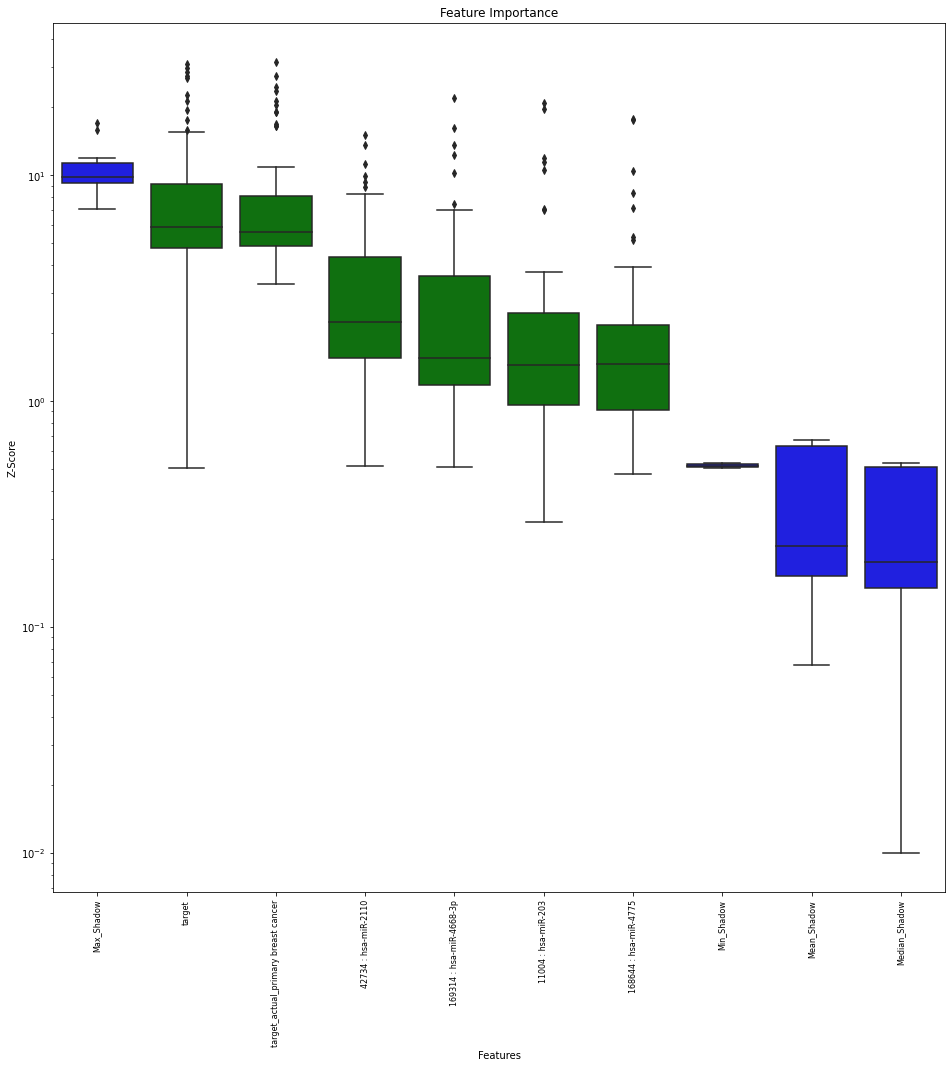

In [ ]:
selector.plot(which_features='accepted', figsize=(16,16))
selector.Subset()

In [ ]:
# Display features to be removed
features_to_remove = selector.features_to_remove
print(features_to_remove)

['4040 : hsa-miR-9-5p' '4610 : hsa-miR-126-3p' '4700 : hsa-miR-140-5p' ...
 '169419 : hsa-miR-300' '169420 : hsa-miR-193b-5p' 'target_actual_nan']


###XGBoost

Feature Importances :  [0.         0.         0.         ... 0.72853863 0.         0.        ]


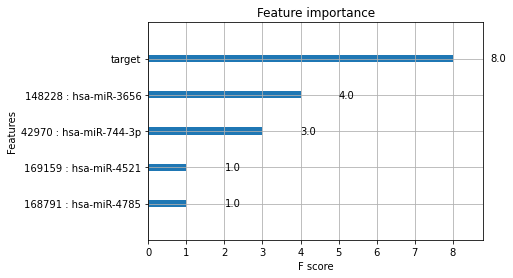

In [ ]:
X = data[feature1]
Y = data["target"]

# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(X, Y)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

# Prediction models

## SVM Modelling

SVM score: 0.9705882352941176


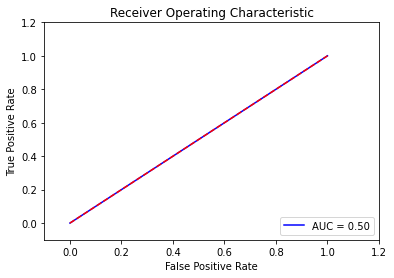

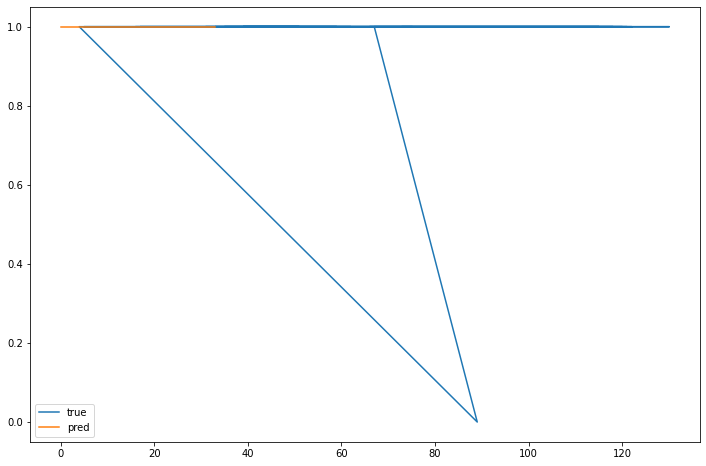

In [ ]:
#Train and Test Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

#Model and Training
clf = svm.SVC()
y_pred=clf.fit(X_train,Y_train).predict(X_test)

X_test.shape

print("SVM score:", clf.score(X_test,Y_test))
#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1= f1_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# prediction: 
trainPred = clf.predict(X_train)
testPred = clf.predict(X_test)

plt.figure(figsize=(12,8))
plt.plot(Y_test,label="true")
plt.plot(testPred, label="pred")
plt.legend()
plt.show()

In [ ]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)
print('\nF-score is: ')
print(f1)

Confusion Matrix is :
[[ 1  0]
 [ 0 33]]

Accuracy is :
1.0

Precision is :
1.0

Recall is: 
1.0

F-score is: 
1.0


## Naive Bayes Modelling

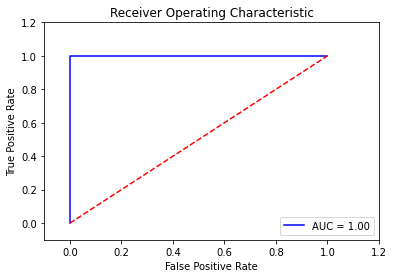

In [ ]:
#Train and Test Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

#Model and Training
gnb = GaussianNB()
y_pred = gnb.fit(X_train,Y_train).predict(X_test)

#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1= f1_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)
print('\nF-score is: ')
print(f1)

Confusion Matrix is :
[[ 1  0]
 [ 0 33]]

Accuracy is :
1.0

Precision is :
1.0

Recall is: 
1.0

F-score is: 
1.0


In [ ]:
print("Naive Bayes score:", gnb.score(X_test,Y_test))

Naive Bayes score: 1.0


## KNN Modelling

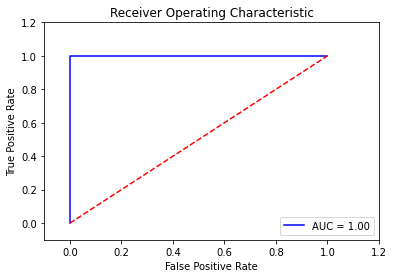

In [ ]:
#Train and Test Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

#Model and Training
knn = KNeighborsClassifier(n_neighbors=5)
y_pred = knn.fit(X_train, Y_train).predict(X_test)

#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1= f1_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)
print('\nF-score is: ')
print(f1)

Confusion Matrix is :
[[ 1  0]
 [ 0 33]]

Accuracy is :
1.0

Precision is :
1.0

Recall is: 
1.0

F-score is: 
1.0


In [ ]:
print("KNN score:", knn.score(X_test,Y_test))

KNN score: 1.0


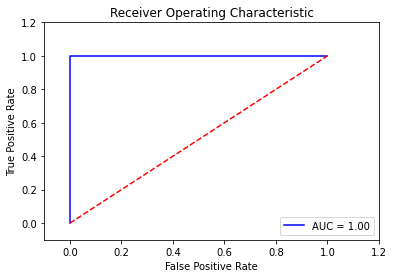

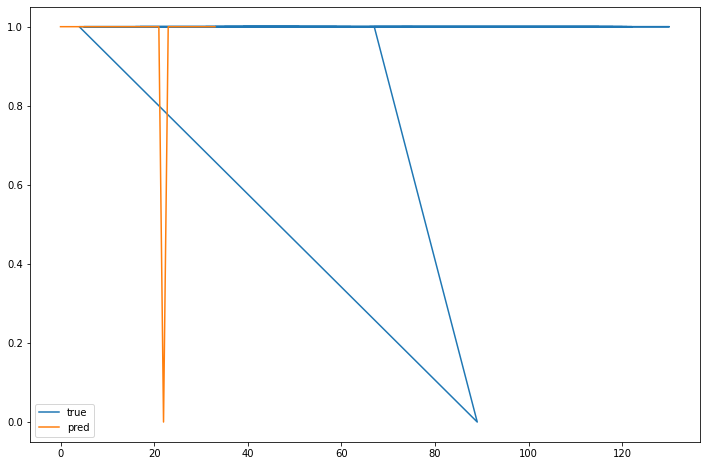

In [ ]:
#Train and Test Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

#Model and Training
knn = KNeighborsClassifier(n_neighbors=3)
y_pred = knn.fit(X_train, Y_train).predict(X_test)

#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1= f1_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# prediction: 
trainPred = knn.predict(X_train)
testPred = knn.predict(X_test)

plt.figure(figsize=(12,8))
plt.plot(Y_test,label="true")
plt.plot(testPred, label="pred")
plt.legend()
plt.show()

In [ ]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)
print('\nF-score is: ')
print(f1)

Confusion Matrix is :
[[ 1  0]
 [ 1 32]]

Accuracy is :
0.9705882352941176

Precision is :
1.0

Recall is: 
0.9696969696969697

F-score is: 
0.9846153846153847


## Random Forest Modelling 

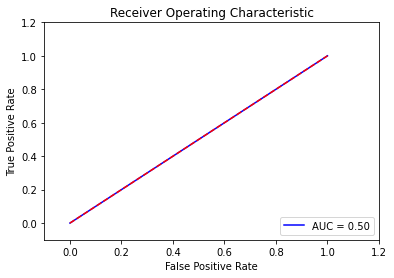

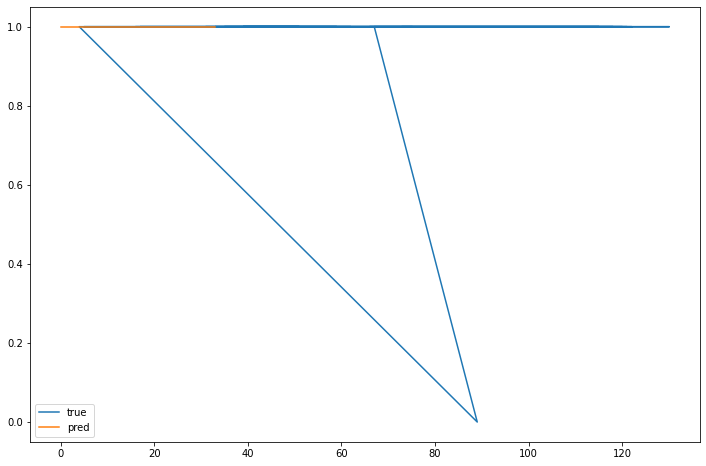

In [ ]:
#Train and Test Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

#Model and Training
forest = RandomForestClassifier(criterion='gini',n_estimators=5,random_state=1,n_jobs=2)
y_pred = forest.fit(X_train, Y_train).predict(X_test)

#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1= f1_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# prediction: 
trainPred = forest.predict(X_train)
testPred = forest.predict(X_test)

plt.figure(figsize=(12,8))
plt.plot(Y_test,label="true")
plt.plot(testPred, label="pred")
plt.legend()
plt.show()

In [ ]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)
print('\nF-score is: ')
print(f1)

Confusion Matrix is :
[[ 1  0]
 [ 2 31]]

Accuracy is :
0.9411764705882353

Precision is :
1.0

Recall is: 
0.9393939393939394

F-score is: 
0.96875


In [ ]:
print("Random Forest score is:", forest.score(X_test,Y_test))

Random Forest score is: 0.9411764705882353


## Logistic Regression Modelling

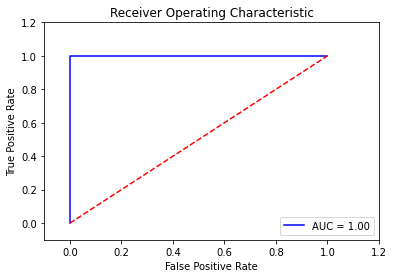

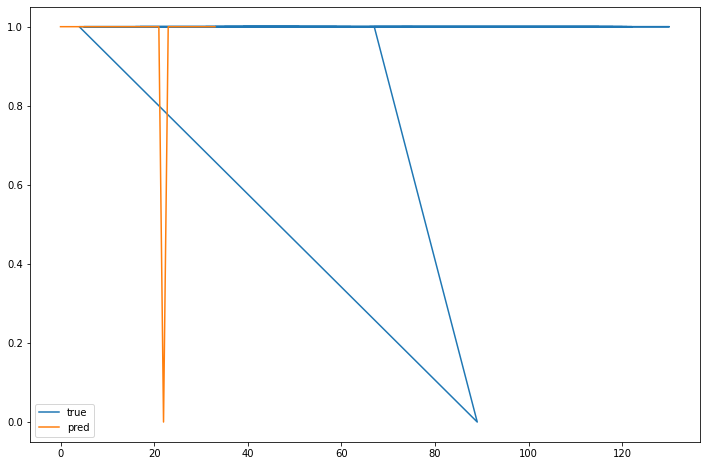

In [ ]:
#Train and Test Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

#Model and Training
LoReg = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',random_state=0)
y_pred = LoReg.fit(X_train, Y_train).predict(X_test)

#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1= f1_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# prediction: 
trainPred = LoReg.predict(X_train)
testPred = LoReg.predict(X_test)

plt.figure(figsize=(12,8))
plt.plot(Y_test,label="true")
plt.plot(testPred, label="pred")
plt.legend()
plt.show()

In [ ]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)
print('\nF-score is: ')
print(f1)

Confusion Matrix is :
[[ 1  0]
 [ 0 33]]

Accuracy is :
1.0

Precision is :
1.0

Recall is: 
1.0

F-score is: 
1.0


In [ ]:
print("Logistic Regression score is:", LoReg.score(X_test,Y_test))

Logistic Regression score is: 1.0


## Multi Layer Perceptron Modelling

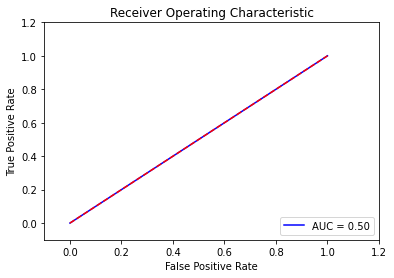

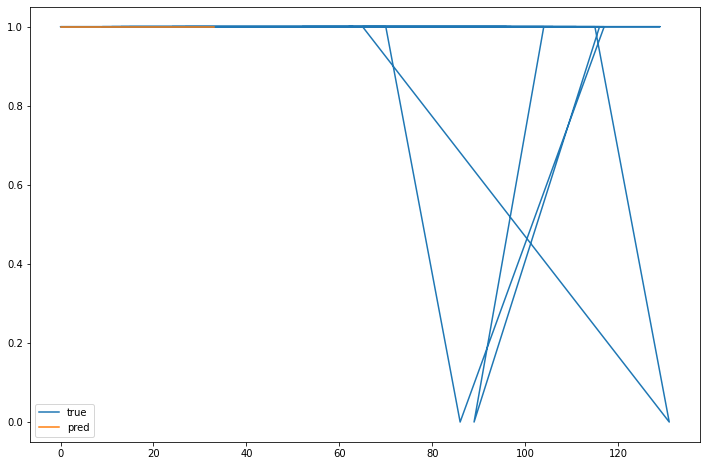

In [ ]:
#Train and Test Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,random_state=1)

#Model and Training
MLP = MLPClassifier(random_state=1, max_iter=300)
y_pred = MLP.fit(X_train, Y_train).predict(X_test)

#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1= f1_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# prediction: 
trainPred = MLP.predict(X_train)
testPred = MLP.predict(X_test)

plt.figure(figsize=(12,8))
plt.plot(Y_test,label="true")
plt.plot(testPred, label="pred")
plt.legend()
plt.show()

In [ ]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)
print('\nF-score is: ')
print(f1)

Confusion Matrix is :
[[ 2  1]
 [ 0 31]]

Accuracy is :
0.9705882352941176

Precision is :
0.96875

Recall is: 
1.0

F-score is: 
0.9841269841269841


In [ ]:
print("Multi Layer Perceptron score is:", MLP.score(X_test,Y_test))

Multi Layer Perceptron score is: 0.9705882352941176


## Decision Tree Modelling

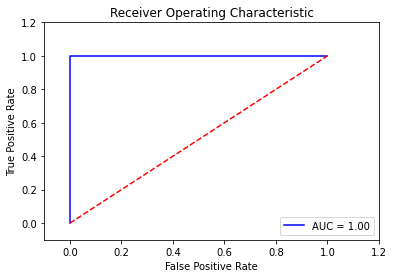

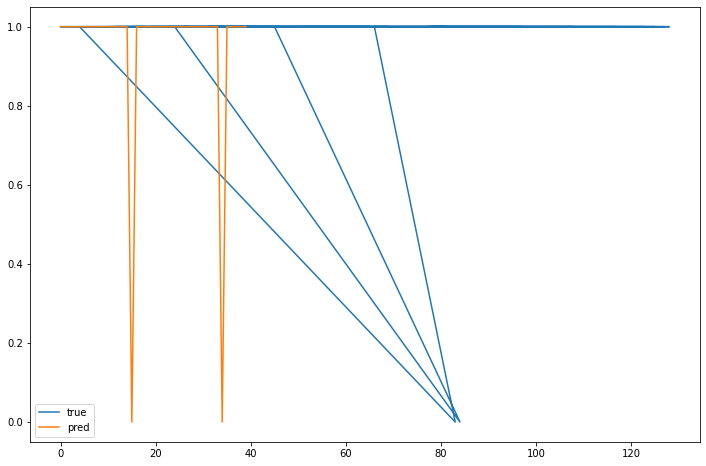

In [ ]:
#Train and Test Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=42)

#Model and Training
DTree = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)
y_pred = DTree.fit(X_train, Y_train).predict(X_test)

#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1= f1_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# prediction: 
trainPred = DTree.predict(X_train)
testPred = DTree.predict(X_test)

plt.figure(figsize=(12,8))
plt.plot(Y_test,label="true")
plt.plot(testPred, label="pred")
plt.legend()
plt.show()

In [ ]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)
print('\nF-score is: ')
print(f1)

Confusion Matrix is :
[[ 1  1]
 [ 1 37]]

Accuracy is :
0.95

Precision is :
0.9736842105263158

Recall is: 
0.9736842105263158

F-score is: 
0.9736842105263158


In [ ]:
print("Decision Tree score is:", DTree.score(X_test,Y_test))

Decision Tree score is: 0.95


###XGBoost

In [ ]:
#Train and Test Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=42)

selection = SelectFromModel(xgb_model)
selection.fit(X_train, Y_train)

# Transform the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, Y_train)

# prediction: 
trainPred = selection.predict(X_train)
testPred = selection.predict(X_test)

plt.figure(figsize=(12,8))
plt.plot(Y_test,label="true")
plt.plot(testPred, label="pred")
plt.legend()
plt.show()

AttributeError: ignored

## Conclusion

* Naive Bayes and KNN algorithms have perfect score for this dataset.
But if neighbors of k-value are equal to  number which is except 5, The accuracy of the algorithm is dropping. So the best neighbor is equal to 5.
* SVM is also good. But when we compare with KNN and Naive Bayes, the accuracy is lower as you can see.